In [1]:
import sys
import os

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.insert(0, project_root)

from models.model_structures import M6

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.001
training_epochs = 20
batch_size = 32

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.USPS(root=project_root + '/Data', train=True, transform=transform, download=True)
test_dataset = datasets.USPS(root=project_root + '/Data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

print("train dataset:", train_dataset.data.shape)
print("test dataset :", test_dataset.data.shape)

train dataset: (7291, 16, 16)
test dataset : (2007, 16, 16)


In [3]:
def train(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (image, label) in enumerate(tqdm(train_loader)):
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        hypothesis = model(image)
        loss = criterion(hypothesis, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = hypothesis.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()

    accuracy = correct / total

    return train_loss / len(train_loader), accuracy

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)

            output = model(image)
            loss = criterion(output, label)
            test_loss += loss.item()

            _, predicted = output.max(1)
            total += label.size(0)
            correct += predicted.eq(label).sum().item()

    test_accuracy = correct / total
    return test_loss / len(test_loader), test_accuracy

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:13<00:00, 16.90it/s]


Epoch: 1/20.. Training loss: 0.542031.. Test loss: 0.372609.. Test Accuracy: 0.884073


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:11<00:00, 19.67it/s]


Epoch: 2/20.. Training loss: 0.164211.. Test loss: 0.332581.. Test Accuracy: 0.915827


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 22.23it/s]


Epoch: 3/20.. Training loss: 0.109174.. Test loss: 0.279119.. Test Accuracy: 0.931956


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:13<00:00, 17.00it/s]


Epoch: 4/20.. Training loss: 0.079548.. Test loss: 0.310167.. Test Accuracy: 0.928427


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 21.16it/s]


Epoch: 5/20.. Training loss: 0.065049.. Test loss: 0.320733.. Test Accuracy: 0.934476


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 22.20it/s]


Epoch: 6/20.. Training loss: 0.046447.. Test loss: 0.310041.. Test Accuracy: 0.928931


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:14<00:00, 15.79it/s]


Epoch: 7/20.. Training loss: 0.038278.. Test loss: 0.295660.. Test Accuracy: 0.943548


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:12<00:00, 18.18it/s]


Epoch: 8/20.. Training loss: 0.032046.. Test loss: 0.295376.. Test Accuracy: 0.945060


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:11<00:00, 19.13it/s]


Epoch: 9/20.. Training loss: 0.031502.. Test loss: 0.294476.. Test Accuracy: 0.949093


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 22.12it/s]


Epoch:10/20.. Training loss: 0.018096.. Test loss: 0.327931.. Test Accuracy: 0.944556


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:12<00:00, 17.87it/s]


Epoch:11/20.. Training loss: 0.020332.. Test loss: 0.343571.. Test Accuracy: 0.940020


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:09<00:00, 23.92it/s]


Epoch:12/20.. Training loss: 0.020314.. Test loss: 0.360073.. Test Accuracy: 0.946573


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 21.63it/s]


Epoch:13/20.. Training loss: 0.016766.. Test loss: 0.344898.. Test Accuracy: 0.946069


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 21.48it/s]


Epoch:14/20.. Training loss: 0.012264.. Test loss: 0.343647.. Test Accuracy: 0.949597


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:12<00:00, 18.55it/s]


Epoch:15/20.. Training loss: 0.015235.. Test loss: 0.343692.. Test Accuracy: 0.948589


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:11<00:00, 19.35it/s]


Epoch:16/20.. Training loss: 0.018035.. Test loss: 0.371326.. Test Accuracy: 0.943548


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:13<00:00, 16.32it/s]


Epoch:17/20.. Training loss: 0.011510.. Test loss: 0.420480.. Test Accuracy: 0.944052


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:08<00:00, 26.74it/s]


Epoch:18/20.. Training loss: 0.011526.. Test loss: 0.408064.. Test Accuracy: 0.945565


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:09<00:00, 23.93it/s]


Epoch:19/20.. Training loss: 0.009537.. Test loss: 0.370720.. Test Accuracy: 0.944556


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:10<00:00, 21.72it/s]


Epoch:20/20.. Training loss: 0.002895.. Test loss: 0.387234.. Test Accuracy: 0.950101


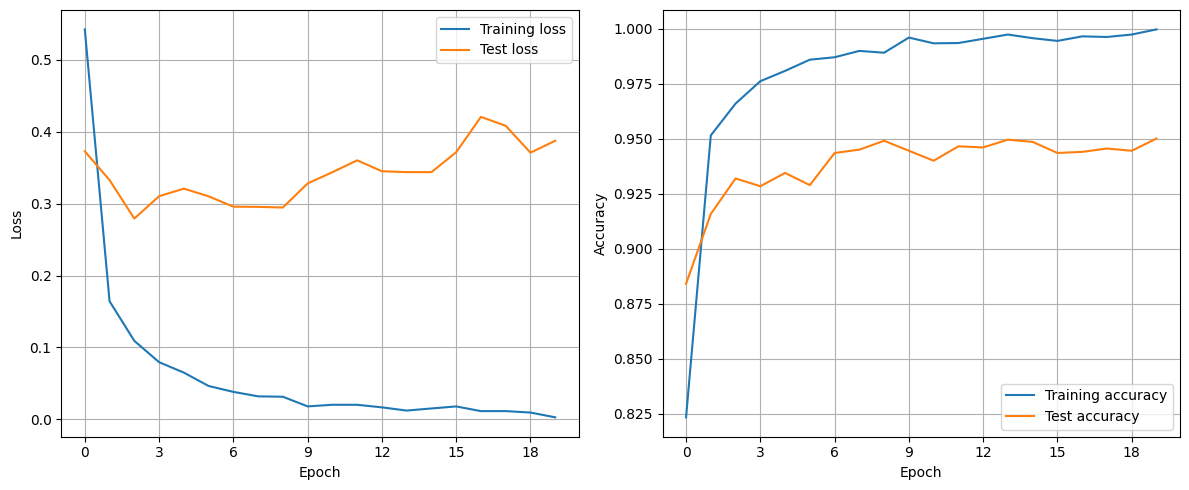

In [4]:
# Model creation
model = M6().to(device)
# Setting up loss function and optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# loss and accuracy value list
loss_keeper = {'train':[], 'test':[]}
accuracy_keeper = {'train': [], 'test': []}

for epoch in range(training_epochs):
    '''
    Training phase
    '''
    train_loss, train_accuracy = train(model, train_loader, optimizer)
    loss_keeper['train'].append(train_loss)
    accuracy_keeper['train'].append(train_accuracy)
    
    '''
    Test phase
    '''
    test_loss, test_accuracy = evaluate(model, test_loader)
    loss_keeper['test'].append(test_loss)
    accuracy_keeper['test'].append(test_accuracy)

    print("Epoch:%2d/%2d.. Training loss: %f.. Test loss: %f.. Test Accuracy: %f" 
          %(epoch + 1, training_epochs, train_loss, test_loss, test_accuracy))
    
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_keeper['train'], label="Training loss")
plt.plot(loss_keeper['test'], label="Test loss")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.subplot(1, 2, 2)
plt.plot(accuracy_keeper['train'], label="Training accuracy")
plt.plot(accuracy_keeper['test'], label="Test accuracy")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.tight_layout()
plt.show()

torch.save(model, project_root + '/models/M6_model.pth')

In [5]:
print(model)

M6(
  (Conv1): Conv2d(1, 6, kernel_size=(4, 4), stride=(2, 2))
  (Square1): Square()
  (Flatten): Flatten()
  (FC1): Linear(in_features=294, out_features=64, bias=True)
  (Square2): Square()
  (FC2): Linear(in_features=64, out_features=10, bias=True)
)
